# Laboratorio 04 - Regresión Logística

## Task 1.1 - Cargar CSV

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import Regression as reg

In [3]:
# Cargar datos del CSV
clean_data = np.genfromtxt('data.csv', delimiter=',',usecols=(0,1,4,5,7,8,9,10,11,14,15), skip_header=True)
# Limpiar la data con NA 
mean = np.nanmean(clean_data, axis=0)	# Calcular la media por cada columna
nan_indices = np.where(np.isnan(clean_data))
clean_data[nan_indices] = 0

In [4]:
# Establecer semilla
np.random.seed(4)

In [5]:
# Randomizar la data
np.random.shuffle(clean_data)

In [6]:
# Normalizar valores
for i in range(clean_data.shape[1] - 1):
	clean_data[:, i] = (clean_data[:, i] - np.mean(clean_data[:, i])) / np.std(clean_data[:, i])

## Task 2.2 - Ajustar un modelo logistico plinomial

### Modelo con una feature polinomial: edad

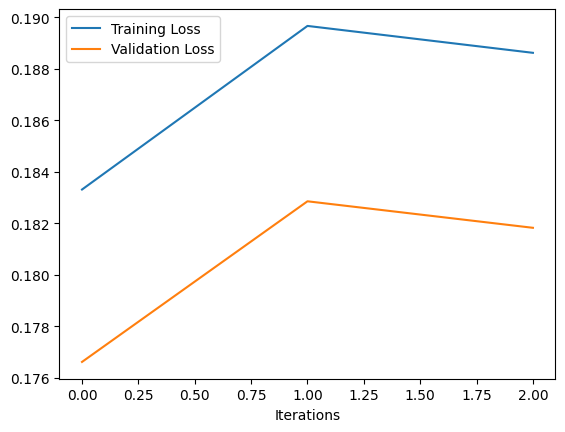

In [8]:
data = clean_data
# Agregar bias y features
ages = data[:,1]
data = np.hstack((np.ones((data.shape[0], 1)), data))	# 1
data = np.hstack((ages.reshape(data.shape[0], 1), data))	# 0
train_data = data[:int(0.4*len(data))]
cv_data = data[int(0.4*len(data)):int(0.8*len(data))]
test_data = data[int(0.8*len(data)):]
train_losses = []
cv_losses = []
theta = np.ones((data.shape[1], 1))
for k in range(1,4):
	# Replace column 0 with the column 3 to the power of k
	train_data[:,0] = train_data[:,7] ** k
	cv_data[:,0] = cv_data[:,7] ** k
	
	X_train = train_data[:, :-1]
	y_train = train_data[:, -1]
	y_train = y_train.reshape(y_train.shape[0], 1)
	
	theta = np.ones((X_train.shape[1], 1))
	theta = reg.linear_regression(X_train, y_train, theta, 0.05, 0.05)
	# J for training data
	y_pred_train = reg.sigmoid(theta, X_train)
	y_pred_train = np.where(y_pred_train > 0.5, 1, 0)
	loss_train = reg.loss(X_train, y_train, theta)
	train_losses.append(loss_train)
	# J for cross validation data
	X_cv = cv_data[:, :-1]
	y_cv = cv_data[:, -1]
	y_cv = y_cv.reshape(y_cv.shape[0], 1)
	y_pred_cv = reg.sigmoid(theta, X_cv)
	y_pred_cv = np.where(y_pred_cv > 0.5, 1, 0)
	loss_cv = reg.loss(X_cv, y_cv, theta)
	cv_losses.append(loss_cv)
plt.plot(train_losses, label='Training Loss')
plt.plot(cv_losses, label='Validation Loss')
plt.legend()
plt.xlabel("Iterations")
plt.show()

### Modelo con dos features polinomiales: edad y cigarros

1


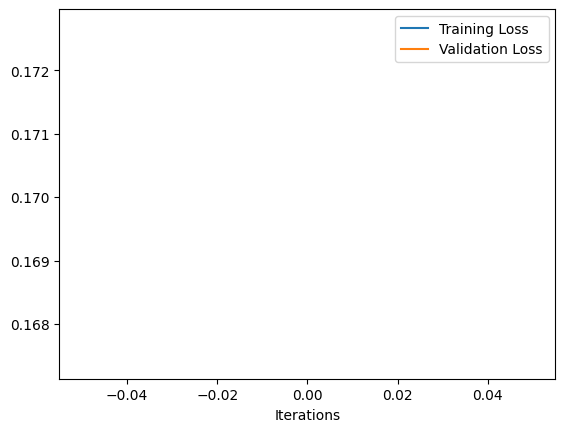

In [26]:
train_losses = []
cv_losses = []
data = clean_data
# Agregar bias y features
ages = data[:,1]
cigs = data[:,2]
data = np.hstack((np.ones((data.shape[0], 1)), data))	# 4
data = np.hstack((ages.reshape(data.shape[0], 1), data))	# 3
data = np.hstack((ages.reshape(data.shape[0], 1), data))	# 1
data = np.hstack((cigs.reshape(data.shape[0], 1), data))	# 1
data = np.hstack((cigs.reshape(data.shape[0], 1), data))	# 0

train_data = data[:int(0.4*len(data))]
cv_data = data[int(0.4*len(data)):int(0.8*len(data))]
test_data = data[int(0.8*len(data)):]
theta = np.ones((data.shape[1], 1))
for k in range(1,5):
	print(k)
	train_data[:,0] = train_data[:,7] ** k-1
	train_data[:,1] = train_data[:,7] ** max(0, k-1)
	train_data[:,2] = train_data[:,6] ** max(0, k)
	train_data[:,3] = train_data[:,6] ** max(0, k-3)
	cv_data[:,0] = cv_data[:,7] ** k-1
	cv_data[:,1] = cv_data[:,7] ** max(0, k-1)
	cv_data[:,2] = cv_data[:,6] ** max(0, k)
	cv_data[:,3] = cv_data[:,6] ** max(0, k-3)
	X_train = train_data[:, :-1]
	y_train = train_data[:, -1]
	y_train = y_train.reshape(y_train.shape[0], 1)
	theta = np.ones((X_train.shape[1], 1))
	theta = reg.linear_regression(X_train, y_train, theta, 0.05, 0.05)
	# J for training data
	y_pred_train = reg.sigmoid(theta, X_train)
	y_pred_train = np.where(y_pred_train > 0.5, 1, 0)
	loss_train = reg.loss(X_train, y_train, theta)
	train_losses.append(loss_train)
	# J for cross validation data
	X_cv = cv_data[:, :-1]
	y_cv = cv_data[:, -1]
	y_cv = y_cv.reshape(y_cv.shape[0], 1)
	y_pred_cv = reg.sigmoid(theta, X_cv)
	y_pred_cv = np.where(y_pred_cv > 0.5, 1, 0)
	loss_cv = reg.loss(X_cv, y_cv, theta)
	cv_losses.append(loss_cv)
	if k == 2:
		best_theta = theta

plt.plot(train_losses, label='Training Loss')
plt.plot(cv_losses, label='Validation Loss')
plt.legend()
plt.xlabel("Iterations")
plt.show()

In [27]:
best_k = 1
test_data = data[int(0.8*len(data)):]
test_data[:,0] = test_data[:,7] ** best_k-1
test_data[:,1] = test_data[:,7] ** max(0, best_k-2)
test_data[:,2] = test_data[:,6] ** max(0, best_k)
test_data[:,3] = test_data[:,6] ** max(0, best_k-3)
X_test = test_data[:, :-1]
y_test = test_data[:, -1]
y_test = y_test.reshape(y_test.shape[0], 1)
y_pred_test = reg.sigmoid(theta, X_test)
y_pred_test = np.where(y_pred_test > 0.5, 1, 0)
loss_test = reg.loss(X_test, y_test, theta)
accuracy_test = np.sum(y_pred_test == y_test) / len(y_test)
precision_test = np.sum(y_pred_test[y_test == 1] == 1) / np.sum(y_pred_test == 1)
print("Accuracy for test data: ", accuracy_test)
print("Precision for test data: ", precision_test)

Accuracy for test data:  0.5672169811320755
Precision for test data:  0.22401847575057737


## Task 2.3 - Análisis de resultados

El modelo con únicamente una feature polinomial no mostró ser tan bueno para generalizar los datos del set de prueba. Por lo tanto, se hizo otro modelo utilizando dos features: cantidad de cigarros y edad. En este modelo, podemos ver que el valor de k que genera un mejor modelo es x. Sin embargo, es interesante ver que la gráfica de pérdidas no sigue un patrón esperado. Esto puede ser debido a la cantidad de datos que se tenían o incluso la calidad de estos.